<a href="https://colab.research.google.com/github/tasniat/Micro-Credential/blob/main/COVIDMiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID 19 Data Analysis**

*   Description: Ingest data from the latest New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 30 days' worth of data for the selected county. Perform EDA and show your findings through different plots and visualization techniques. 

*   Task 1 : Environment Set up
*   Task 2 : Data Collection
*   Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)
*   Task4: Understand NY Covid 19 data in last 30 days
*   Task5: Comparing Covid 19 data with different states
*   Task6: Conclusion

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',10)
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [ ]:
len(df)

927008

In [ ]:
pd.set_option('display.max_rows',50)
df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
927003,2021-01-13,Sweetwater,Wyoming,56037.0,3222,26.0
927004,2021-01-13,Teton,Wyoming,56039.0,2502,4.0
927005,2021-01-13,Uinta,Wyoming,56041.0,1774,9.0
927006,2021-01-13,Washakie,Wyoming,56043.0,829,23.0


In [ ]:
df[df['state'] == "New York"]

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0.0
448,2020-03-02,New York City,New York,NaN,1,0.0
482,2020-03-03,New York City,New York,NaN,2,0.0
518,2020-03-04,New York City,New York,NaN,2,0.0
519,2020-03-04,Westchester,New York,36119.0,9,0.0
...,...,...,...,...,...,...
925661,2021-01-13,Washington,New York,36115.0,1313,20.0
925662,2021-01-13,Wayne,New York,36117.0,3395,48.0
925663,2021-01-13,Westchester,New York,36119.0,80145,1750.0
925664,2021-01-13,Wyoming,New York,36121.0,1905,36.0


In [ ]:
# dfny = df[['date','county','state','fips','cases','deaths']].where(df['state'] == 'New York')
# dfny

In [ ]:
# dfny = df[df['state'] == "New York"].copy()
# dfny

In [3]:
dfnyc = df[df['county'] == "New York City"].copy()
dfnyc

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0.0
448,2020-03-02,New York City,New York,NaN,1,0.0
482,2020-03-03,New York City,New York,NaN,2,0.0
518,2020-03-04,New York City,New York,NaN,2,0.0
565,2020-03-05,New York City,New York,NaN,4,0.0
...,...,...,...,...,...,...
919145,2021-01-11,New York City,New York,NaN,493306,25635.0
922390,2021-01-12,New York City,New York,NaN,498877,25698.0
925636,2021-01-13,New York City,New York,NaN,504826,25741.0
928881,2021-01-14,New York City,New York,NaN,510711,25834.0


In [ ]:
dfnyc['fips'].is_unique

False

In [4]:
dfnyc.drop(['fips'], inplace=True, axis=1)
dfnyc

,date,county,state,cases,deaths
416,2020-03-01,New York City,New York,1,0.0
448,2020-03-02,New York City,New York,1,0.0
482,2020-03-03,New York City,New York,2,0.0
518,2020-03-04,New York City,New York,2,0.0
565,2020-03-05,New York City,New York,4,0.0
...,...,...,...,...,...
919145,2021-01-11,New York City,New York,493306,25635.0
922390,2021-01-12,New York City,New York,498877,25698.0
925636,2021-01-13,New York City,New York,504826,25741.0
928881,2021-01-14,New York City,New York,510711,25834.0


In [5]:
dfnyc.sort_values(by='date', ascending = False)

,date,county,state,cases,deaths
932126,2021-01-15,New York City,New York,517963,25909.0
928881,2021-01-14,New York City,New York,510711,25834.0
925636,2021-01-13,New York City,New York,504826,25741.0
922390,2021-01-12,New York City,New York,498877,25698.0
919145,2021-01-11,New York City,New York,493306,25635.0
...,...,...,...,...,...
565,2020-03-05,New York City,New York,4,0.0
518,2020-03-04,New York City,New York,2,0.0
482,2020-03-03,New York City,New York,2,0.0
448,2020-03-02,New York City,New York,1,0.0


In [ ]:
print(dfnyc.tail(30))

              date         county     state  fips   cases   deaths
831522  2020-12-15  New York City  New York   NaN  367198  24561.0
834768  2020-12-16  New York City  New York   NaN  370109  24578.0
838014  2020-12-17  New York City  New York   NaN  373320  24613.0
841259  2020-12-18  New York City  New York   NaN  377728  24652.0
844505  2020-12-19  New York City  New York   NaN  381067  24677.0
847750  2020-12-20  New York City  New York   NaN  383808  24697.0
850995  2020-12-21  New York City  New York   NaN  387595  24735.0
854240  2020-12-22  New York City  New York   NaN  391634  24768.0
857485  2020-12-23  New York City  New York   NaN  395810  24790.0
860730  2020-12-24  New York City  New York   NaN  401251  24842.0
863975  2020-12-25  New York City  New York   NaN  405857  24889.0
867220  2020-12-26  New York City  New York   NaN  410048  24931.0
870465  2020-12-27  New York City  New York   NaN  413472  24973.0
873710  2020-12-28  New York City  New York   NaN  416922  250

In [ ]:
dfnyc['cases'].dtype

dtype('int64')

In [6]:
dfnyc = dfnyc.sort_values(by='date', ascending = True)
dfnyc['Cases_Difference'] = dfnyc["cases"] - dfnyc["cases"].shift()
dfnyc

,date,county,state,cases,deaths,Cases_Difference
416,2020-03-01,New York City,New York,1,0.0,NaN
448,2020-03-02,New York City,New York,1,0.0,0.0
482,2020-03-03,New York City,New York,2,0.0,1.0
518,2020-03-04,New York City,New York,2,0.0,0.0
565,2020-03-05,New York City,New York,4,0.0,2.0
...,...,...,...,...,...,...
919145,2021-01-11,New York City,New York,493306,25635.0,5755.0
922390,2021-01-12,New York City,New York,498877,25698.0,5571.0
925636,2021-01-13,New York City,New York,504826,25741.0,5949.0
928881,2021-01-14,New York City,New York,510711,25834.0,5885.0


In [7]:
dfnyc = dfnyc.sort_values(by='date', ascending = True)
dfnyc['Deaths_Difference'] = dfnyc["deaths"] - dfnyc["deaths"].shift()
dfnyc

,date,county,state,cases,deaths,Cases_Difference,Deaths_Difference
416,2020-03-01,New York City,New York,1,0.0,NaN,NaN
448,2020-03-02,New York City,New York,1,0.0,0.0,0.0
482,2020-03-03,New York City,New York,2,0.0,1.0,0.0
518,2020-03-04,New York City,New York,2,0.0,0.0,0.0
565,2020-03-05,New York City,New York,4,0.0,2.0,0.0
...,...,...,...,...,...,...,...
919145,2021-01-11,New York City,New York,493306,25635.0,5755.0,73.0
922390,2021-01-12,New York City,New York,498877,25698.0,5571.0,63.0
925636,2021-01-13,New York City,New York,504826,25741.0,5949.0,43.0
928881,2021-01-14,New York City,New York,510711,25834.0,5885.0,93.0


In [8]:
dfnyc = dfnyc.sort_values(by='date', ascending = False)
dfnyc = dfnyc.head(30)
dfnyc

,date,county,state,cases,deaths,Cases_Difference,Deaths_Difference
932126,2021-01-15,New York City,New York,517963,25909.0,7252.0,75.0
928881,2021-01-14,New York City,New York,510711,25834.0,5885.0,93.0
925636,2021-01-13,New York City,New York,504826,25741.0,5949.0,43.0
922390,2021-01-12,New York City,New York,498877,25698.0,5571.0,63.0
919145,2021-01-11,New York City,New York,493306,25635.0,5755.0,73.0
...,...,...,...,...,...,...,...
850995,2020-12-21,New York City,New York,387595,24735.0,3787.0,38.0
847750,2020-12-20,New York City,New York,383808,24697.0,2741.0,20.0
844505,2020-12-19,New York City,New York,381067,24677.0,3339.0,25.0
841259,2020-12-18,New York City,New York,377728,24652.0,4408.0,39.0


In [9]:
ny = df[df['state'] == "New York"]
nyc = ny[ny['county']=="New York City"]
cases = nyc["cases"].iloc[-1] - nyc["cases"].iloc[-31]
deaths = nyc["deaths"].iloc[-1] - nyc["deaths"].iloc[-31]
print(f"Total cases in pase 30 days {cases}")
print(f"Total cases in pase 30 days {deaths}") 

Total cases in pase 30 days 147854
Total cases in pase 30 days 1331.0


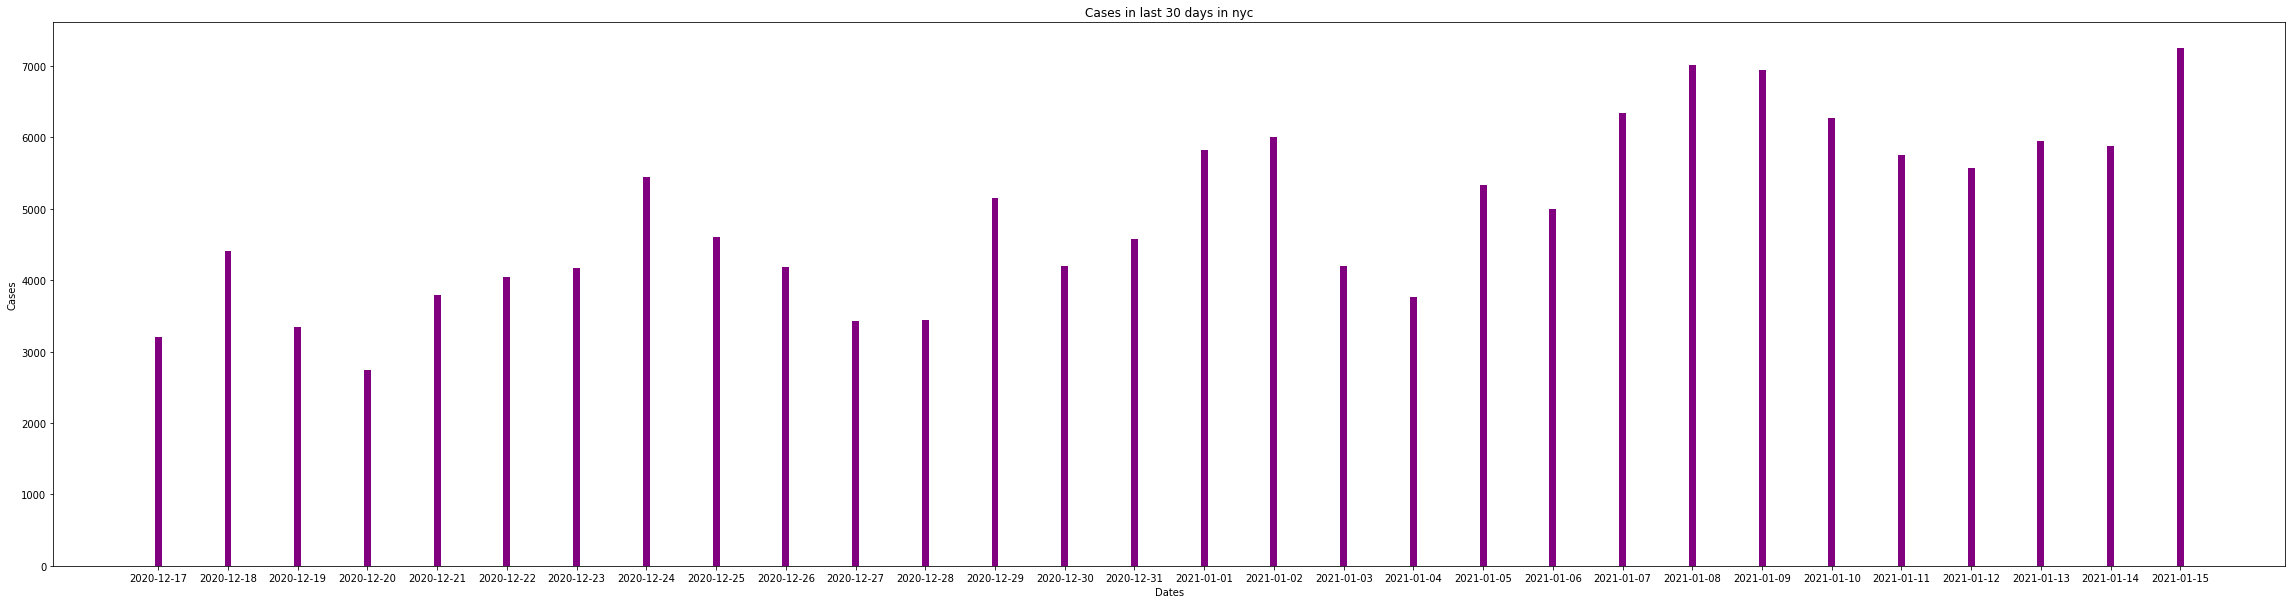

In [10]:
import matplotlib.pyplot as plt

x = (nyc["date"].iloc[-30:])
y =[]
k=nyc["cases"].iloc[-31]
for i in  nyc["cases"].iloc[-30:]:
  y.append(i-k)
  k=i 
   
fig = plt.figure(figsize = (40, 10)) 
  
# creating the bar plot 
plt.bar(x, y, color ='purple',  
        width = 0.1) 
  
plt.xlabel("Dates") 
plt.ylabel("Cases") 
plt.title("Cases in last 30 days in nyc") 
plt.show() 

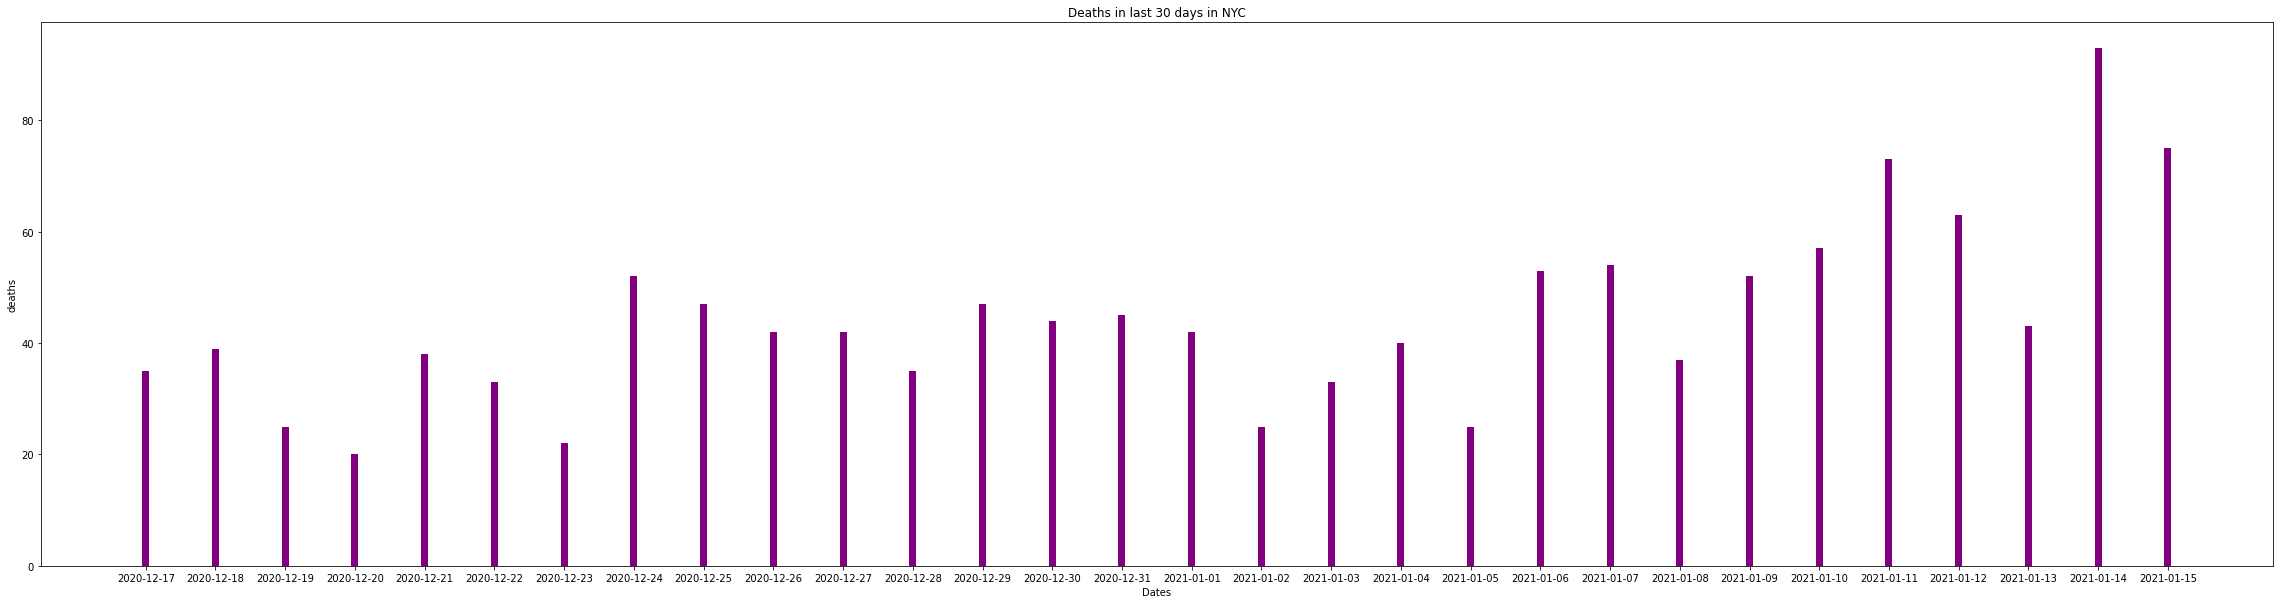

In [11]:
x = (nyc["date"].iloc[-30:])
y =[]
k=nyc["deaths"].iloc[-31]
for i in nyc["deaths"].iloc[-30:]:
  y.append(i-k)
  k=i
   
fig = plt.figure(figsize = (40, 10)) 
  
# creating the bar plot 
plt.bar(x, y, color ='purple',  
        width = 0.1) 
  
plt.xlabel("Dates") 
plt.ylabel("deaths") 
plt.title("Deaths in last 30 days in NYC") 
plt.show() 

In [ ]:
import seaborn as sns
%matplotlib inline

In [ ]:
dfnyc = dfnyc.sort_values(by='date', ascending = True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


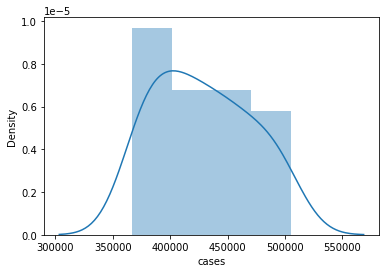

In [ ]:
sns.distplot(dfnyc['cases'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


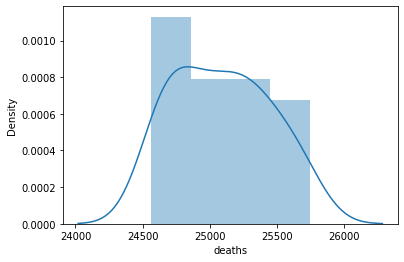

In [ ]:
sns.distplot(dfnyc['deaths'])

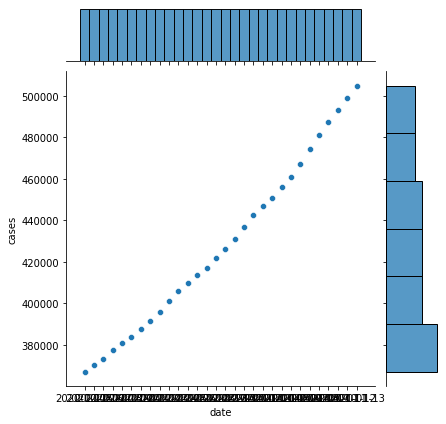

In [ ]:
sns.jointplot(x='date', y='cases', data=dfnyc)

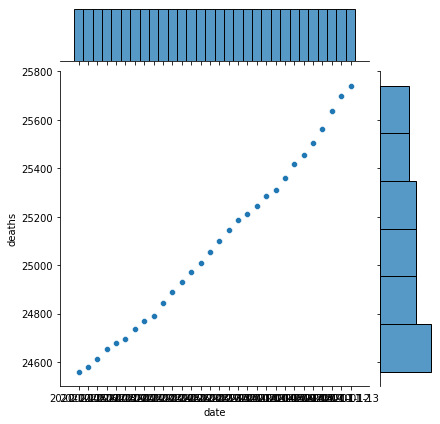

In [ ]:
sns.jointplot(x='date', y='deaths', data=dfnyc)

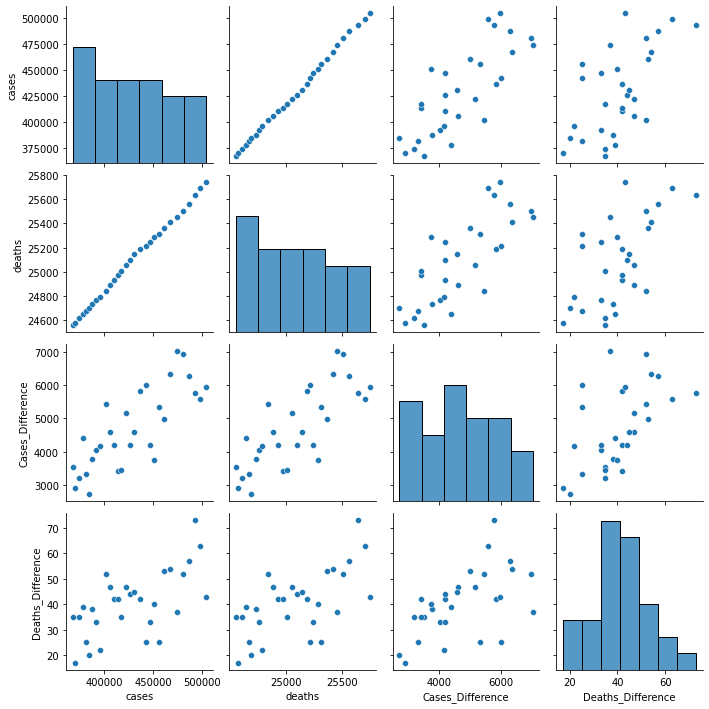

In [ ]:
sns.pairplot(dfnyc)

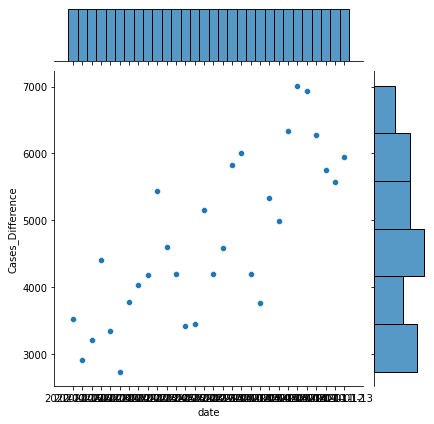

In [ ]:
sns.jointplot(x='date', y='Cases_Difference', data=dfnyc)

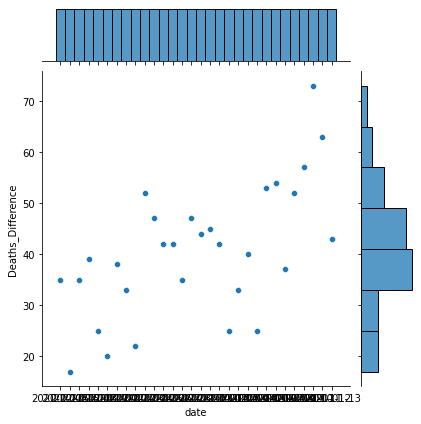

In [ ]:
sns.jointplot(x='date', y='Deaths_Difference', data=dfnyc)

In [ ]:
dfny = df[df['state'] == "New York"].copy()
dfny

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0.0
448,2020-03-02,New York City,New York,NaN,1,0.0
482,2020-03-03,New York City,New York,NaN,2,0.0
518,2020-03-04,New York City,New York,NaN,2,0.0
519,2020-03-04,Westchester,New York,36119.0,9,0.0
...,...,...,...,...,...,...
925661,2021-01-13,Washington,New York,36115.0,1313,20.0
925662,2021-01-13,Wayne,New York,36117.0,3395,48.0
925663,2021-01-13,Westchester,New York,36119.0,80145,1750.0
925664,2021-01-13,Wyoming,New York,36121.0,1905,36.0


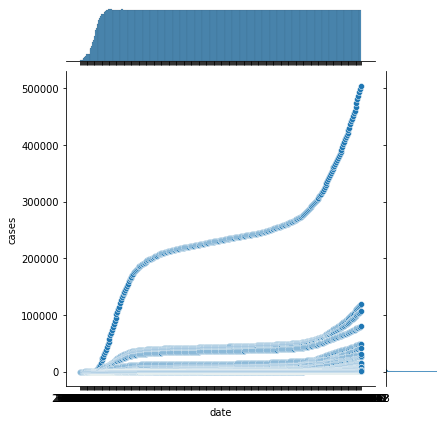

In [ ]:
sns.jointplot(x='date', y='cases', data=dfny)

In [ ]:
dfca = df[df['state'] == "California"].copy()
dfca

,date,county,state,fips,cases,deaths
5,2020-01-25,Orange,California,6059.0,1,0.0
9,2020-01-26,Los Angeles,California,6037.0,1,0.0
10,2020-01-26,Orange,California,6059.0,1,0.0
14,2020-01-27,Los Angeles,California,6037.0,1,0.0
15,2020-01-27,Orange,California,6059.0,1,0.0
...,...,...,...,...,...,...
924001,2021-01-13,Tulare,California,6107.0,39347,482.0
924002,2021-01-13,Tuolumne,California,6109.0,3270,36.0
924003,2021-01-13,Ventura,California,6111.0,55342,388.0
924004,2021-01-13,Yolo,California,6113.0,9857,131.0


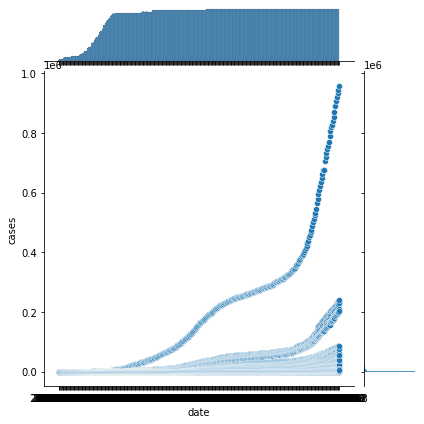

In [ ]:
sns.jointplot(x='date', y='cases', data=dfca)

In [ ]:
df_al = df[df['state'] == "Alaska"].copy()
df_al

,date,county,state,fips,cases,deaths
1364,2020-03-12,Anchorage,Alaska,2020.0,1,0.0
1624,2020-03-13,Anchorage,Alaska,2020.0,1,0.0
1940,2020-03-14,Anchorage,Alaska,2020.0,1,0.0
2317,2020-03-15,Anchorage,Alaska,2020.0,1,0.0
2746,2020-03-16,Anchorage,Alaska,2020.0,1,0.0
...,...,...,...,...,...,...
923852,2021-01-13,Southeast Fairbanks Census Area,Alaska,2240.0,408,3.0
923853,2021-01-13,Unknown,Alaska,NaN,348,1.0
923854,2021-01-13,Valdez-Cordova Census Area,Alaska,2261.0,379,2.0
923855,2021-01-13,Wrangell City and Borough,Alaska,2275.0,24,0.0


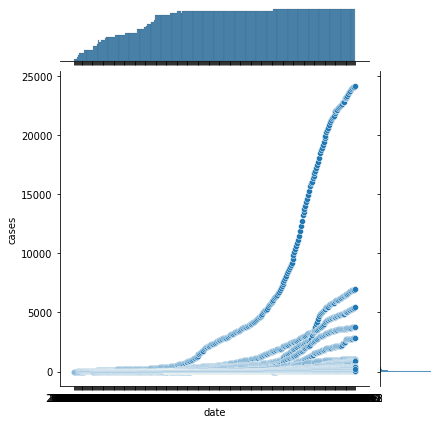

In [ ]:
sns.jointplot(x='date', y='cases', data=df_al)

In [ ]:
ny = df[df['state'] == "New York"]
nycasestotal = ny['cases'].sum()
nycasestotal

140422119

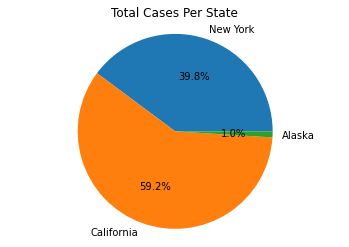

In [ ]:
import matplotlib.pyplot as plt
ny = df[df['state'] == "New York"]
nycasestotal = ny['cases'].sum()
cali = df[df['state'] == "California"]
calicasestotal = cali['cases'].sum()
alas = df[df['state'] == "Alaska"]
alascasestotal = alas['cases'].sum()

my_data = [nycasestotal,calicasestotal,alascasestotal]
my_labels = 'New York','California','Alaska'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Total Cases Per State')
plt.axis('equal')
plt.show()

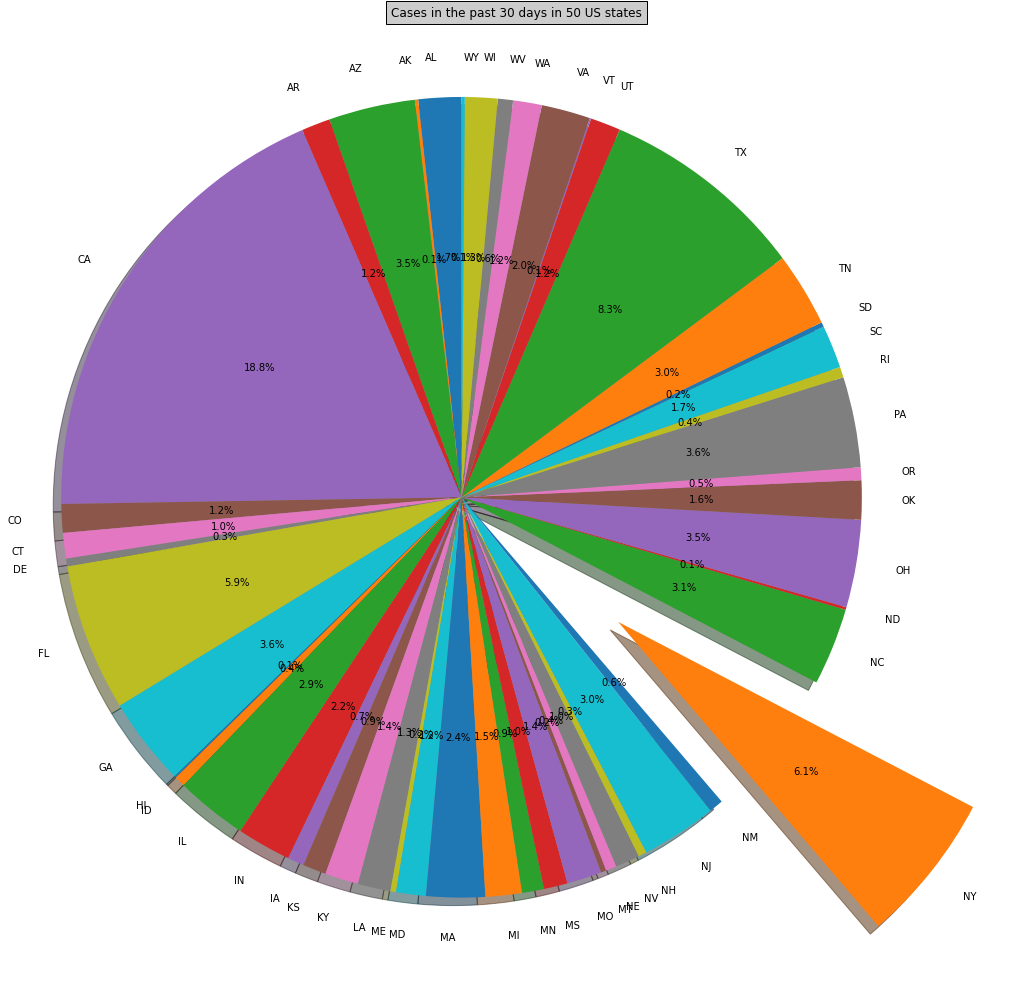

In [ ]:
from datetime import date, timedelta

yesterday = (date.today()-timedelta(days=2)).isoformat()
thirtydaysago = (date.today()-timedelta(days=30)).isoformat()
us_states =["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
abbr_states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA","HI", "ID", 
               "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO",
               "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", 
               "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

cases_us_states=[]
for i in us_states:
    currState = df[df['state'] == i]

    cases_us_states.append(((currState['cases'].where(currState["date"]==yesterday)).sum())-((currState['cases'].where(currState["date"]==thirtydaysago)).sum()))

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(cases_us_states, explode=explode, labels=abbr_states, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1 = plt.gcf()
fig1.set_size_inches(18,18) # or (4,4) or (5,5) or whatever
plt.title("Cases in the past 30 days in 50 US states" ,bbox={'facecolor':'0.8', 'pad':5})

plt.show()